## Random forest
Test pour l'anglais.

In [1]:
# importing modules
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
# load data
df = pd.read_csv("../data/extracted_data_en.csv")
data = pd.read_csv("../data/vectorized_data_en.csv")

In [3]:
data['cat_id'] = df['Party'] # adding labels to vectorized texts
train, test = train_test_split(data, test_size=0.2, 
                               train_size=0.8, shuffle=True)

In [12]:
x_train, y_train_label = train.loc[:, "0":"19"], train["cat_id"].values.astype(object)
x_test, y_test_label = test.loc[:, "0":"19"], test["cat_id"].values.astype(object)

In [13]:
y_train_label

array(['ELDR', 'PSE', 'PPE-DE', ..., 'Verts-ALE', 'PPE-DE', 'PSE'],
      dtype=object)

In [5]:
print(np.unique(y_train_label)) # 5 parties

['ELDR' 'GUE-NGL' 'PPE-DE' 'PSE' 'Verts-ALE']


In [6]:
# encoding string labels as numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
# encoding train labels
encoder.fit(y_train_label)
y_train = encoder.transform(y_train_label)
# encoding test labels
encoder.fit(y_test_label)
y_test = encoder.transform(y_test_label)
print(y_train)

[0 3 2 ... 4 2 3]


> **Feature scaling**: standardize independent features present in the data in a fixed range. used to handle highly varying magnitudes/values/units... important if we want all features to be on a *comparable scale* and have *comparable ranges*.


Plus d'infos [ici](https://www.geeksforgeeks.org/ml-feature-scaling-part-2/) et [ici aussi](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# standardization of the data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [8]:
# grid search
from sklearn.model_selection import cross_val_score, GridSearchCV
n_estimators = [20, 25]
max_depth = [15, 25, 30]
criterion = ["gini"]
min_samples_leaf = [2, 3]
bootstrap = [True]
max_samples = [500, 1000, 5000, 7000]

param_grid = {
    "n_estimators" : n_estimators,
    "max_depth" : max_depth,
    "min_samples_leaf" : min_samples_leaf,
    "bootstrap" : bootstrap,
    "max_samples" : max_samples,
    "criterion" : criterion
}

rf = RandomForestClassifier(random_state=42)
rf_model = GridSearchCV(estimator=rf, param_grid=param_grid,
                        verbose=10, n_jobs=1)
rf_model.fit(x_train_scaled, y_train)

print("Using hyperparameters --> \n", rf_model.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20


[CV 1/5; 1/48] END bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20;, score=0.334 total time=   0.2s
[CV 2/5; 1/48] START bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20
[CV 2/5; 1/48] END bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20;, score=0.342 total time=   0.2s
[CV 3/5; 1/48] START bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20
[CV 3/5; 1/48] END bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20;, score=0.342 total time=   0.2s
[CV 4/5; 1/48] START bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20
[CV 4/5; 1/48] END bootstrap=True, criterion=gini, max_depth=15, max_samples=500, min_samples_leaf=2, n_estimators=20;, score=0.335 total time=   0.2s
[CV 5/5; 1/48] START bootstrap=True,

In [9]:
print(rf_model.best_params_)
print(rf_model.best_score_)
print(rf_model.best_estimator_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_samples': 7000, 'min_samples_leaf': 3, 'n_estimators': 25}
0.3532752500806712
RandomForestClassifier(max_depth=15, max_samples=7000, min_samples_leaf=3,
                       n_estimators=25, random_state=42)


In [10]:
y_pred = rf_model.predict(x_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Text(0.5, 1.0, 'Confusion Matrix for english')

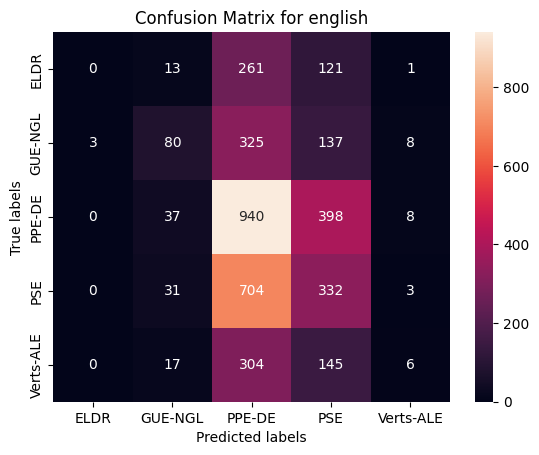

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['ELDR', 'GUE-NGL', 'PPE-DE','PSE','Verts-ALE']
ax = plt.subplot()
cm = confusion_matrix(y_test_label, y_pred_label)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for english')
#sns.heatmap(cm, annot=True).set(title="Matrice de confusion")
